<a href="https://colab.research.google.com/github/QuangLe102/AI/blob/main/BT_ANN_ROBOT2BACTUDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
#import thư viện

from sklearn.utils import shuffle
import cv2
import pickle
import sklearn
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras.utils import to_categorical 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math
import csv

In [14]:
l1=50
l2=40
z=[]
for t1 in range(0,180,1):
  for t2 in range(0,180,1):
    x=l1*math.cos(math.radians(t1))+l2*math.cos(math.radians(t1+t2))
    y=l1*math.sin(math.radians(t1))+l2*math.sin(math.radians(t1+t2))
    z.append(np.array((t1,t2,x,y)))
    label = ['theta1', 'theta2', 'x', 'y']
with open('robot2btd.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(label)
    writer.writerows(z)

In [16]:
data = pd.read_csv('robot2btd.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]
x=numpy_dataset[:,2:]
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 2)                 66        
                                                                 
Total params: 14,946
Trainable params: 14,946
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='mse', optimizer =Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, epochs = 30, validation_split = 0.2)

Epoch 1/30
324/324 [==============================] - 2s 4ms/step - loss: 4180.5347 - accuracy: 0.6518 - val_loss: 2948.1738 - val_accuracy: 0.6993
Epoch 2/30
324/324 [==============================] - 1s 3ms/step - loss: 591.3989 - accuracy: 0.8733 - val_loss: 110.5861 - val_accuracy: 0.9483
Epoch 3/30
324/324 [==============================] - 1s 3ms/step - loss: 55.6372 - accuracy: 0.9468 - val_loss: 120.7619 - val_accuracy: 0.9319
Epoch 4/30
324/324 [==============================] - 1s 3ms/step - loss: 34.2259 - accuracy: 0.9599 - val_loss: 15.5362 - val_accuracy: 0.9659
Epoch 5/30
324/324 [==============================] - 1s 3ms/step - loss: 24.3285 - accuracy: 0.9666 - val_loss: 14.5333 - val_accuracy: 0.9749
Epoch 6/30
324/324 [==============================] - 1s 3ms/step - loss: 20.8015 - accuracy: 0.9718 - val_loss: 17.9839 - val_accuracy: 0.9763
Epoch 7/30
324/324 [==============================] - 1s 3ms/step - loss: 23.2623 - accuracy: 0.9675 - val_loss: 10.1234 - val_ac

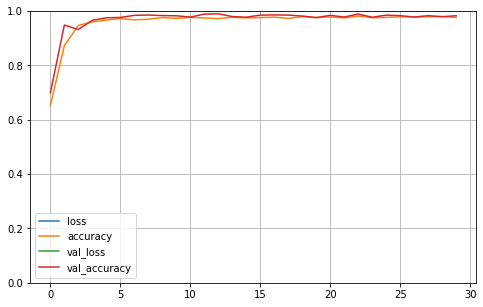

In [18]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

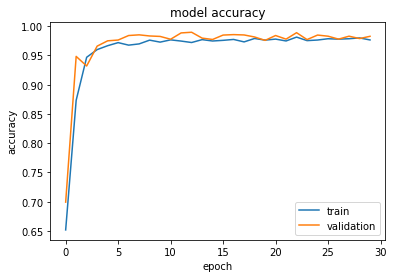

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

In [24]:
Px_test_train = 60
Py_test_train = 30
print(Px_test_train,Py_test_train)
ktra = model.predict([[Px_test_train,Py_test_train]])
t1 = ktra[0][0]
t2 = ktra[0][1]
X1=l1*math.cos(math.radians(t1))+l2*math.cos(math.radians(t1+t2))
Y1=l1*math.sin(math.radians(t1))+l2*math.sin(math.radians(t1+t2))
print('x = ',X1,'\ny = ',Y1)
print('Góc Theta 1 = ', t1,'\nGóc Theta 2 = ', t2)

60 30
x =  55.97071879529013 
y =  34.20029550054007
Góc Theta 1 =  -6.093878 
Góc Theta 2 =  87.09986
